<img src="https://lh3.googleusercontent.com/pw/ACtC-3fFHZrzKpHGWl0vYz7Sr8FX8QqLQ_tc8XHBSwqQnM4hgsIOjtjaOde1M9oHSAfe1Fs2SwVORlapit4-JOz0mjP8Tnz6HetkLZDZb8CifSd0uoSp1Nj3wG_wh1sEQlKXXzvEA9Y9HnQqu2Ecv2igmInb=w1097-h235-no?authuser=0" alt="2020年度ゲノム情報解析入門" height="100px" align="middle">

# 機械学習 - 勾配法 - [課題]

実習テキストは [こちら](https://colab.research.google.com/github/CropEvol/lecture/blob/master/textbook_2020/L13_ML_gradient_method.ipynb)


### 課題で使用するデータセット

　次のコードセルを実行して、データファイル（[gene_expression.csv](https://github.com/CropEvol/lecture/blob/master/textbook_2019/dataset/gene_expression.csv)）をダウンロードしてください。

ファイルの詳細:
- ファイル名: gene_expression.csv
- カンマ区切りテキストファイル
- 100行（100サンプル） x 51列（表現型値 + 50個の遺伝子発現量）


In [3]:
# データの読み込み
!wget -q -O gene_expression.csv https://raw.githubusercontent.com/CropEvol/lecture/master/data/gene_expression.csv
# 動画再生用モジュール
!wget -q -O gradient_method.py https://raw.githubusercontent.com/CropEvol/lecture/master/modules/gradient_method.py
!apt-get -q install ffmpeg

# pandasで読み込み
import pandas as pd
df = pd.read_csv("gene_expression.csv", sep=",", header=0)
df

Reading package lists...
Building dependency tree...
Reading state information...
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


,phenotype,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,gene_40,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,gene_50
0,106,13.363546,9.278575,5.358185,0.0,9.765873,8.267274,8.848567,8.651335,0.000000,8.002230,8.366921,8.514351,10.887784,0.000000,9.774787,5.190678,3.764463,12.259178,11.218678,10.832407,2.571919,8.963477,10.996029,10.287828,0.000000,9.988457,3.559663,10.178441,11.031060,0.000000,3.856906,9.876285,12.381172,1.024462,1.484705,3.811430,7.298979,6.028980,2.052242,7.156204,9.181366,6.790668,8.519664,8.670568,5.904554,9.069909,0.925468,13.735503,8.783810,9.430137
1,109,13.046248,11.941187,6.384982,0.0,8.924542,8.799204,9.670269,8.171432,1.096936,6.360194,9.221483,8.613462,9.515351,0.000000,9.157463,6.023834,2.546092,12.522574,10.916798,11.271603,0.000000,9.275510,10.878472,10.277322,0.361432,10.539614,4.106859,9.382164,13.289126,0.000000,4.387618,9.704644,11.847981,1.147828,1.712772,3.165542,7.152082,3.956205,1.712772,8.527016,9.119561,7.666501,9.198592,8.630143,4.655506,7.797830,0.650305,13.732358,9.361080,8.794585
2,119,13.097211,9.040640,4.770866,0.0,9.704101,7.710614,8.763461,8.279875,0.471760,8.292386,8.464962,8.098364,9.326176,0.000000,10.089808,2.393553,3.362133,12.664074,11.155229,11.293477,2.591703,9.319205,11.125568,10.224629,0.826681,9.593610,0.000000,9.201876,12.856612,0.000000,3.822771,9.918771,11.291251,0.000000,0.000000,3.610759,9.226304,4.888568,1.731487,8.571476,8.162089,7.402986,9.271246,9.998943,6.334062,6.989695,0.000000,13.804555,9.067929,7.143628
3,93,15.187503,8.813056,5.511784,0.0,9.434128,9.329489,10.592504,7.566518,4.776025,7.920996,8.632912,8.309035,10.498610,0.703544,10.775907,8.046338,2.984389,11.851566,9.509466,10.458437,0.703544,8.616836,10.440931,9.815484,1.174470,9.902380,5.749454,8.294671,9.954150,0.000000,2.984389,9.618461,11.097670,0.000000,0.000000,4.217153,9.311049,6.574106,4.523480,6.834610,10.464229,8.637473,8.434903,8.889617,2.984389,7.276041,3.950123,14.342589,9.908996,12.049794
4,84,14.076757,7.670217,4.338645,0.0,10.950235,9.461948,9.954554,9.512503,0.000000,5.813361,7.406503,6.645653,10.005274,0.000000,6.659796,5.721960,2.683629,13.191783,9.930696,10.792310,0.000000,8.557602,10.465964,10.450283,0.000000,10.246337,4.504550,6.774721,9.236043,0.000000,3.069943,11.052935,11.918971,0.000000,0.990084,3.374344,9.280504,3.625574,2.683629,10.251021,9.960994,6.819502,9.416861,9.173680,3.152265,4.762205,2.154486,13.137153,9.657865,7.594929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,13.346763,8.601243,5.679286,0.0,9.508676,8.637904,8.885413,6.878897,1.056930,7.110854,8.058165,8.405975,9.197526,0.000000,10.545727,6.821481,2.173639,11.483569,11.405126,10.793969,0.000000,9.072205,10.140536,9.828387,1.389952,9.103007,6.540901,2.678635,10.399257,0.000000,4.532953,9.385317,11.888507,0.000000,0.344942,5.527033,6.824921,6.381766,3.098201,9.582710,7.940948,7.895842,8.682219,9.885536,6.010762,10.732532,2.336826,14.542288,9.426110,11.623287
96,103,12.535288,7.530406,6.515419,0.0,9.315795,9.186164,8.653254,8.906494,0.842939,7.766072,8.279884,7.785230,9.381895,0.000000,9.287368,5.649891,4.537526,13.552969,10.561689,11.174757,0.612683,9.534352,9.998999,9.682914,0.338681,8.530633,3.830702,9.530744,10.843317,0.000000,3.466444,9.188782,12.262999,0.000000,1.967242,2.824788,5.337019,2.653381,2.877666,10.363861,7.677487,5.579799,9.144281,9.286756,5.021640,9.429762,1.371503,14.691651,9.820975,5.619158
97,102,14.522330,3.591536,4.703632,0.0,9.932421,8.076816,8.589984,10.027173,0.000000,10.058912,8.648120,7.101640,10.820841,0.000000,6.518055,6.853023,0.452595,1

### 課題で構築するモデル

> gene_7の遺伝子発現量から表現型値（phenotype）を予測する線形回帰モデルを、**確率的勾配降下法**で作る
  $$ y = \beta_{gene\_7} x_{gene\_7} + e $$

---
## 課題1: 前処理

<small>※ この課題は、下記コードを実行するのみです。</small>

　次のコードセルを実行して、使用する説明変数と目的変数を準備してください。

実行される内容: 
- 説明変数（`gene_7`）、目的変数（`phenotype`）をデータセットから取り出す
- 説明変数の正規化（変数の値を0 ~ 1の範囲に変換する）
- グラフ描画


<small>今回の課題では、モデルの評価をおこないません。そのため、モデル評価用のデータを準備する「データセットの分割」は今回おこないません。実際の機械学習では、「データセットの分割」もおこなうのが一般的です。</small>



In [36]:
# データの準備
import numpy as np
x = np.array(df["gene_7"]).reshape(-1,1) # 説明変数x
y = np.array(df["phenotype"])            # 目的変数y

# 説明変数xの正規化
from sklearn.preprocessing import MinMaxScaler 
mms = MinMaxScaler()
x = mms.fit_transform(x)

# グラフ
import matplotlib.pyplot as plt
plt.scatter(x, y, color="blue", label="training data") # データ
plt.xlabel("gene expression (normalized)")  # x軸ラベル
plt.ylabel("phenotype value")               # y軸ラベル
plt.legend()  # 凡例
plt.show()

## 課題2: モデルの選択＆モデルの学習

　次のコードセルには、最小二乗法（scikit-learnの`LinearRegression`）で線形回帰モデルを構築するコードが書かれています。

　コードセルを編集して、確率的勾配降下法（scikit-learnの`SGDRegressor`）で線形回帰モデルを構築するコードに変えてください。なお、確率的勾配降下法のトレーニング回数や学習率は自由に設定してください。

Coefficient= [-15.08027861]
Intercept= 103.91020442593563
R2= 0.1866518007841398


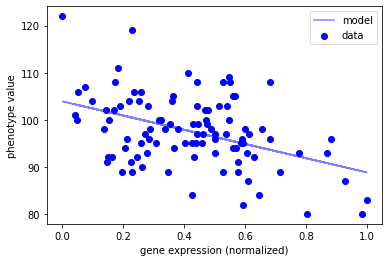

In [38]:
# ============== 編集エリア(start) =============
# モデルの選択
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# モデルの学習
lr.fit(x, y)
# ============== 編集エリア(end) ==============

# 学習済み線形回帰モデルの係数と誤差を表示
print("Coefficient=", lr.coef_)   # 係数b （傾き）
print("Intercept="  , lr.intercept_) # 誤差e (切片)
print("R2="  , lr.score(x, y)) # 決定係数R2

# グラフ
import matplotlib.pyplot as plt
plt.scatter(x, y, color="blue", label="data") # データ
plt.plot(x, lr.predict(x), color="blue", alpha=0.5, label="model") # 学習済み線形回帰モデルの直線
plt.xlabel("gene expression (normalized)") # x軸ラベル
plt.ylabel("phenotype value")              # y軸ラベル
plt.legend()                # 凡例
plt.show()

#### 解答例

Coefficient= [-13.53741747]
Intercept= [103.01469169]
R2= 0.18362900902175439


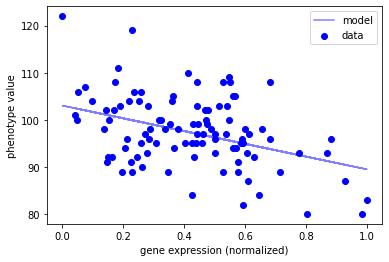

In [39]:
# ============== 編集エリア(start) =============
# モデルの選択
from sklearn.linear_model import SGDRegressor
lr = SGDRegressor(max_iter=100, eta0=0.01, learning_rate="constant")

# モデルの学習
lr.fit(x, y)
# ============== 編集エリア(end) ==============

# 学習済み線形回帰モデルの係数と誤差を表示
print("Coefficient=", lr.coef_)   # 係数b （傾き）
print("Intercept="  , lr.intercept_) # 誤差e (切片)
print("R2="  , lr.score(x, y)) # 決定係数R2

# グラフ
import matplotlib.pyplot as plt
plt.scatter(x, y, color="blue", label="data") # データ
plt.plot(x, lr.predict(x), color="blue", alpha=0.5, label="model") # 学習済み線形回帰モデルの直線
plt.xlabel("gene expression (normalized)") # x軸ラベル
plt.ylabel("phenotype value")              # y軸ラベル
plt.legend()                # 凡例
plt.show()

---
## 課題提出について

**提出期限: 1月18日（月）**

　次の手順で、課題を提出してください。

1. 課題取り組み後のノートブックの共有リンクを発行する。  
  共有リンク発行手順:
  1. ノートブックを保存する
    - 「ファイル」 > 「保存」または「ドライブにコピーを保存」
  1. 共有リンクを発行する  
    - 右上の「共有」ボタンをクリックする
    - 「リンクを知っている全員に変更」をクリックする
    - 権限が「閲覧者」になっているか確認する
    - 共有リンクをコピーする
1. [PandAのゲノム情報解析入門ページ](https://panda.ecs.kyoto-u.ac.jp/portal/site/2020-111-5323-000)にアクセスする
1. 今回の課題提出ページに移動する  
  - 「課題」 > 「第13回（1月12日）の課題」
1. 上で発行した共有リンクを提出フォームに貼り付ける
1. 提出する



<img src="https://lh3.googleusercontent.com/pw/ACtC-3fY_OEQDEDFt6jq8EwbeBH0LU2rT6Ik-7tELLlaBPYI8dyOwcQ7PKSMLuaG9YYydjEBJ4ZyG86ScnKpRY6OLc0QZpjxa0sztcZ3xNprpFY92ogPWOjedJ8P72tgi397k4_vbp8Pa9lqTNapwf6RT_M7=w1326-h1094-no?authuser=0" alt="課題提出フォームへの入力例" height="500px" align="middle">